In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Functions

In [2]:
def RRD(num,highs): #Relaxed Random Deposition Function
    
    m = min(highs)
    
    if(high[num] == m):
        high[num] += 1
        
    elif(high[(num-1)%length] == high[(num+1)%length] and high[(num-1)%length] == m):
        r = np.random.choice([-1,1])
        num = (num + r)%length
        high[num] += 1
    else:
        if(high[(num-1)%length] == m):
            num = (num-1)%length
            high[num] += 1
        if(high[(num+1)%length] == m):
            num = (num+1)%length
            high[num] += 1
    return(num, high[num])

## Generate Data

In [3]:
length = 200
point_number = 4000000


In [17]:

stds = []
time = np.array([])

for k in range(100):
    
    x = 4
    std = np.array([])
    
    high = np.zeros(length)
    if (k == 1):
        point = []

    for i in range(point_number):

        count = np.random.randint(0, length)
        count, h = RRD(count,[high[(count-1)%length],high[count],high[(count+1)%length]])
        if (i == np.floor(1.3**(x))):
            if (k == 1):
                time = np.append(time,i)
            std = np.append(std,np.std(high))
            x +=1
        if (k == 1):                
            point.append([count,high[count]])

    stds.append(std) 
stds = np.transpose(np.array(stds))    


## Statistic

In [18]:
final_std = np.zeros(len(stds))
for n in range(0,len(stds)):
    final_std[n] = np.mean(stds[n])

In [19]:
pointDF = pd.DataFrame(point)
data = np.transpose(np.array([time,final_std]))
data = pd.DataFrame(data,columns=['Time','Std'])

### save data

In [20]:
data.to_csv(r'C:\Users\Mahdi\Desktop\programing\python project\Comphys\HW2\Statistical Data RRD')
pointDF.to_csv(r'C:\Users\Mahdi\Desktop\programing\python project\Comphys\HW2\Point Data RRD')

### Read data for Different length

In [4]:
data = pd.read_csv('Statistical Data RRD')


coef1 = np.polyfit(np.log(data['Time'][14:39]),np.log(data['Std'][14:39]),1)
betha = coef1[0]
coef20 = np.polyfit(np.log(data['Time'][46:]),np.log(data['Std'][46:]),1)


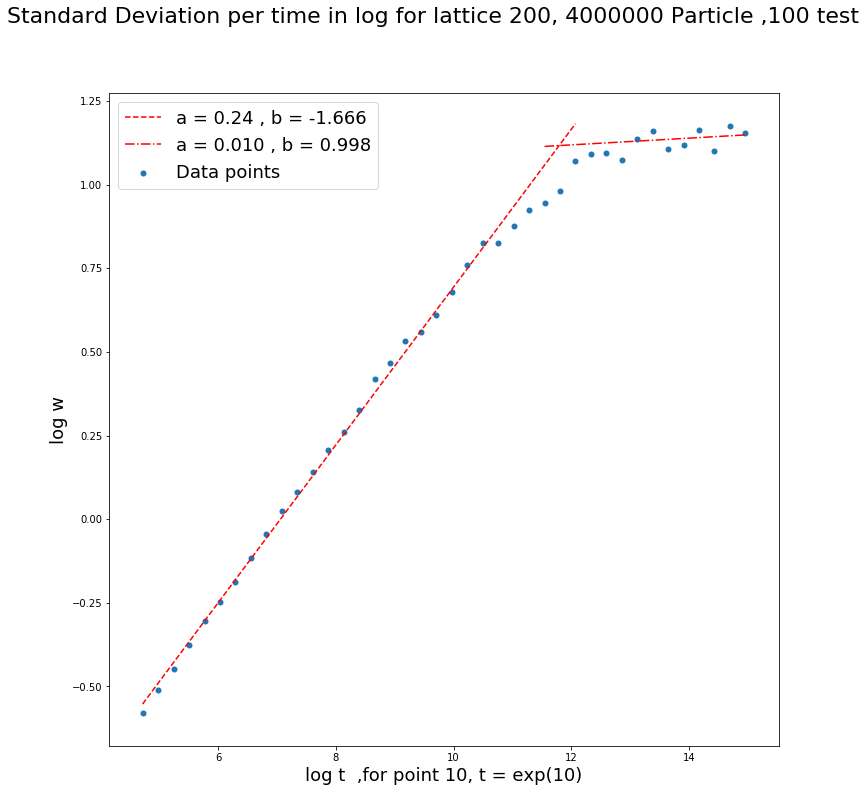

In [5]:
fig = plt.figure(figsize=(12,12))

fig.suptitle('Standard Deviation per time in log for lattice %i, %i Particle ,100 test'%(length,point_number),fontsize=22)

plt.plot(np.log(data['Time'][14:43]),np.polyval(coef1,np.log(data['Time'][14:43])),'r--',label = 'a = 0.24 , b = -1.666' )
plt.plot(np.log(data['Time'][40:]),np.polyval(coef20,np.log(data['Time'][40:])),'r-.',label = 'a = 0.010 , b = 0.998')
plt.scatter(np.log(data['Time'][14:]),np.log(data['Std'][14:]),marker='o',linewidths=0.01,label = 'Data points')

plt.xlabel('log t  ,for point 10, t = exp(10)', fontsize=18)
plt.ylabel('log w', fontsize=18)


leg = plt.legend(fontsize = 18);
plt.savefig('RRD fig1')


## plot Standard Deviation per time for different lattice

In [6]:
data1 = pd.read_csv('Statistical Data RRD1')
data2 = pd.read_csv('Statistical Data RRD2')
data3 = pd.read_csv('Statistical Data RRD3')
data4 = pd.read_csv('Statistical Data RRD4')

from functools import reduce

dfs = [data,data1,data2,data3,data4]

df_final = reduce(lambda left,right: pd.merge(left,right,on='Time'), dfs)
datas = df_final.drop(columns=['Unnamed: 0_x' , 'Unnamed: 0_y'])

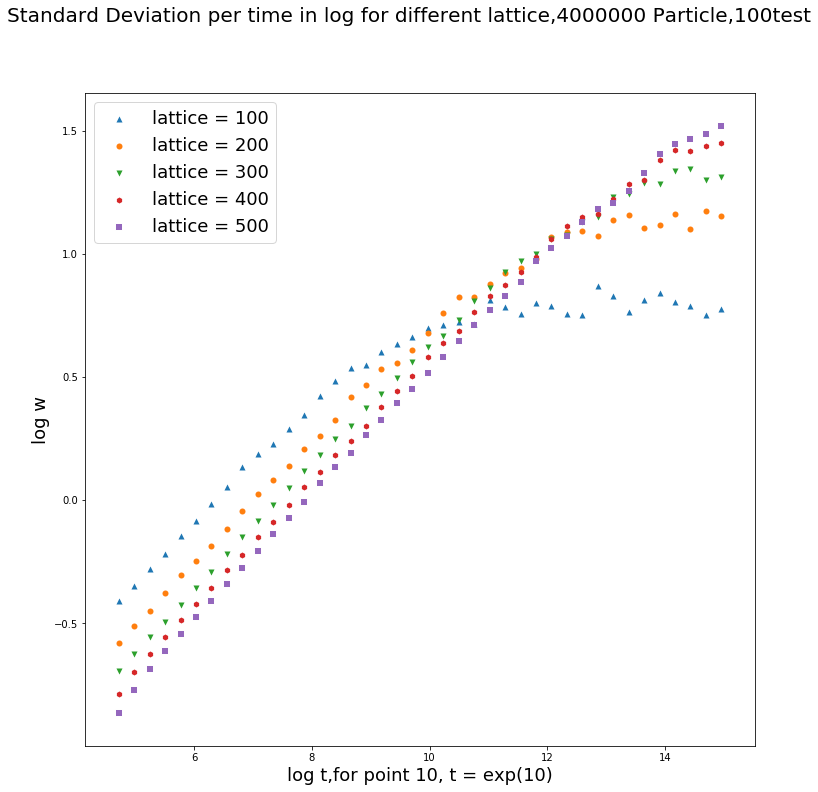

In [7]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
fig.suptitle('Standard Deviation per time in log for different lattice,4000000 Particle,100test',fontsize=20)

ax.scatter(np.log(datas['Time'][14:]),np.log(datas['Std1'][14:]),marker='^',linewidths=0.01,label = 'lattice = 100')
ax.scatter(np.log(datas['Time'][14:]),np.log(datas['Std'][14:]),marker='o',linewidths=0.01,label = 'lattice = 200')
ax.scatter(np.log(datas['Time'][14:]),np.log(datas['Std2'][14:]),marker='v',linewidths=0.01,label = 'lattice = 300')
ax.scatter(np.log(datas['Time'][14:]),np.log(datas['Std3'][14:]),marker='h',linewidths=0.01,label = 'lattice = 400')
ax.scatter(np.log(datas['Time'][14:]),np.log(datas['Std4'][14:]),marker='s',linewidths=0.01,label = 'lattice = 500')

ax.set_xlabel('log t,for point 10, t = exp(10)', fontsize=18)
ax.set_ylabel('log w', fontsize=18)

leg = ax.legend(fontsize = 18);

#plt.savefig('RRD fig2')

## plot Standard Deviation per length 

In [10]:
coef20 = np.polyfit(np.log(datas['Time'][46:]),np.log(datas['Std'][46:]),1)
coef21 = np.polyfit(np.log(datas['Time'][38:]),np.log(datas['Std1'][38:]),1)
coef22 = np.polyfit(np.log(datas['Time'][49:]),np.log(datas['Std2'][49:]),1)
coef23 = np.polyfit(np.log(datas['Time'][50:]),np.log(datas['Std3'][50:]),1)
np.exp(datas['Std2'][49]);

همانطور که در نمودار بالا مشاهده میشود برای شبکه با طول500 با 4 ملیون ذره به طور مشخص به حد اشباع نرسیدیم

In [11]:
Wss = [datas['Std1'][38],datas['Std'][46],datas['Std2'][49],datas['Std3'][50]]
Length = [100,200,300,400]

coef3 = np.polyfit(np.log(Length),np.log(Wss),1)
alpha = coef3[0]
coef3

array([ 0.43308917, -1.17436822])

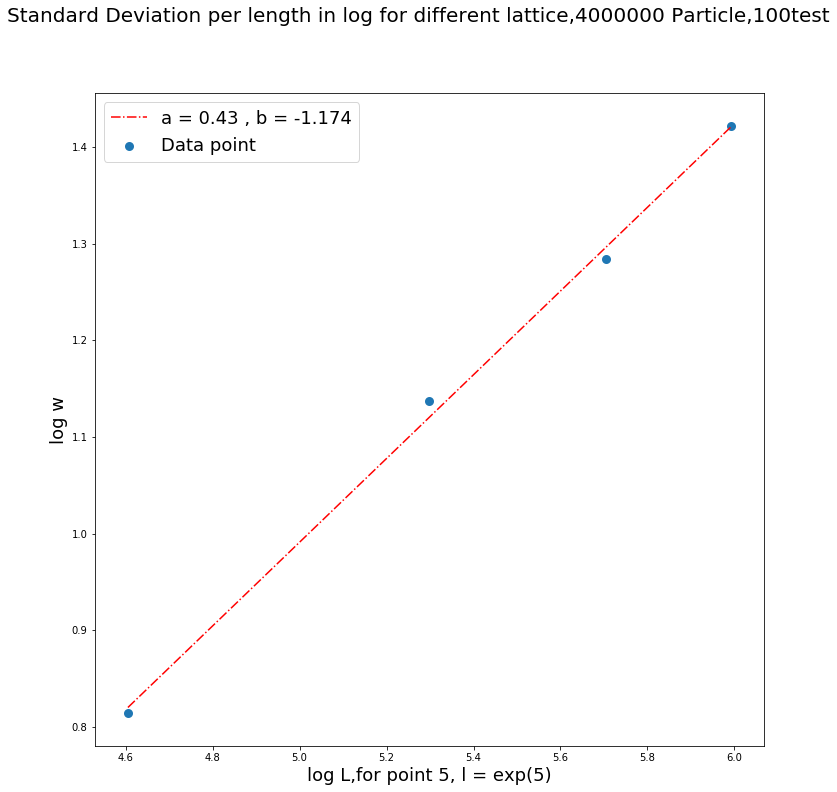

In [12]:
fig = plt.figure(figsize=(12,12))

fig.suptitle('Standard Deviation per length in log for different lattice,4000000 Particle,100test',fontsize=20)

plt.plot(np.log(Length),np.polyval(coef3,np.log(Length)),'r-.',label = 'a = 0.43 , b = -1.174')
plt.scatter(np.log(Length),np.log(Wss),marker='o',linewidths='3',label = 'Data point')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('log L,for point 5, l = exp(5)', fontsize=18)
plt.ylabel('log w', fontsize=18)

leg = plt.legend(fontsize = 18);
#plt.savefig('RRD fig3')

# Result

In [13]:
print('betha = %.3f , error = %.2f percent'%(betha,((0.24-betha)/0.24)*100))
print('alpha = %.3f, error = %.2f percent'%(alpha,((0.48-alpha)/0.48)*100))
print('z = %.3f '%(alpha / betha))

betha = 0.236 , error = 1.65 percent
alpha = 0.433, error = 9.77 percent
z = 1.835 


## Simulation

In [4]:
pointDF = pd.read_csv('Point Data RRD')
pointDF = pointDF.drop(columns=['Unnamed: 0'])
point = pointDF.as_matrix()

C:\Users\Mahdi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
%matplotlib
point_number1 = 60000
point = np.transpose(np.array(point))


step = int(np.floor(point_number1 / 4))
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.axis('off')
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,point_number1,step):
    if (i/step)%2 == 0 :
        ax.scatter(point[0][i:i+step],point[1][i:i+step],marker='.',c = 'b')
    else:
        ax.scatter(point[0][i:i+step],point[1][i:i+step],marker='.',c = 'r')
    fig.canvas.draw()
    plt.pause(1) 
plt.savefig('RRD fig4')

Using matplotlib backend: Qt5Agg
